In [1]:
from scipy import stats
import numpy as np

In [2]:
F = stats.norm()
#loc -> mean, scale -> s.d.
G = stats.norm(loc=3, scale=2)

In [3]:
# Probability of drawing 1 from the distribution
F.pdf(1)

0.24197072451914337

In [4]:
#Random number form the dist.
F.rvs()

-0.1388123360822321

In [5]:
F.rvs(size=2)

array([0.4971139 , 0.71663346])

In [6]:
from matplotlib import pyplot as plt
X = np.linspace(-4, 4, 100)
plt.plot(X, F.pdf(X))
plt.show()

<Figure size 640x480 with 1 Axes>

Use that 
$$ E[f(x)] = \int^{\infty}_{-\infty} h(x) f_X (x) = \frac{1}{N} \sum^{N}_{i=0} h(x_i) $$,
where $ x_i \sim \mathcal N (0, 1)$ in that case.

### Random draw from a standard normal dist. (P>3)

In [7]:
def norm_sampling(N: int) -> float:
    
    from scipy import stats
    import numpy as np
    
    F = stats.norm()
    sample = F.rvs(size=N)
    
    total = 0
    
    for i in sample:
        
        if i <= 3:
            h = 0
        else:
            h = 1
        
        total += h
    
    return total/N

In [8]:
norm_sampling(10000000)

0.0013783

### A more general function for importance sampling

In [9]:
def importance_sampler(f, g, h, n):
    
    '''
    Calculates the integral of a given distribution f, given g, h and n. 
    
    f - target distribution
    g - importance distribution
    h - indicator function
    n - sample size
    '''
    try:
        sample = g.rvs(size=n)
        total = sum([h(y)*f.pdf(y)/g.pdf(y) for y in sample])
    
        return total/n
    
    except:
        print('Please give a function on which the rvs and pdf methods are callable.')

In [10]:
F = stats.norm()
G = stats.norm(loc = 4, scale = 1)

In [11]:
def h(y):
    
    if y <= 3:
        return 0
    else:
        return 1

In [12]:
importance_sampler(F, G, h, 100000)

0.0013725878046338806

### A problem with gamma distribution

```
A tech support hotline receives an average of 2 calls per minute. What is the
probability that they will have to wait at least 10 minutes to receive 9 calls?
```

In [13]:
F = stats.gamma(a=9, scale=.5)

<function matplotlib.pyplot.show(*args, **kw)>

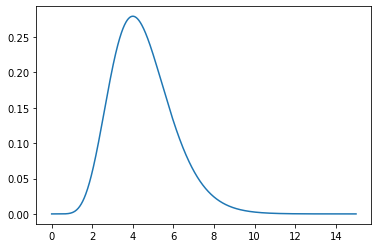

In [14]:
# Let's plot it, so I can find a good importance dist. for it
X = np.linspace(0, 15, 1000)
plt.plot(X, F.pdf(X))
plt.show

```
We want to see the integral of this function above 10, so it is beter to choose an importance dist. that also overlaps that region.
```

In [15]:
G = stats.norm(loc=10, scale=3)

In [16]:
def h(y):
    
    if y < 10:
        return 0
    else:
        return 1

In [17]:
importance_sampler(F, G, h, 100000)

0.002087346429188492

### A two dimensional example

In [18]:
F = stats.multivariate_normal(mean=np.zeros(2), cov=np.eye(2))
G = stats.multivariate_normal(mean=np.array([1, 1]), cov=np.eye(2))

In [19]:
def h(x, y):
    
    if x < -1 and y > 1:
        return 1
    else:
        return 0

In [20]:
def multidim_importance_sampler(f, g, h, n):
    
        
    '''
    Calculates the integral of a given distribution f, given g, h and n. 
    
    f - multidimensional target distribution
    g - multidimensional importance distribution
    h - indicator function
    n - sample size
    '''
    
    try:
        sample = g.rvs(size=n)
        total = sum([h(x, y)*f.pdf((x, y))/g.pdf((x, y)) for x, y in sample])
    
        return total/n
    
    except:
        print('Please give a function on which the rvs and pdf methods are callable.')

In [21]:
multidim_importance_sampler(F, G, h, 500000)

0.024741631411004824